<a href="https://colab.research.google.com/github/guebin/DV2023/blob/main/posts/10wk-2.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" style="text-align: left"></a>

# 1. 강의영상 

{{<video ???? >}}

# 2. Imports

In [1]:
import numpy as np
import pandas as pd 
import plotly.io as pio

In [2]:
pd.options.plotting.backend = "plotly"
pio.templates.default = "plotly_white"
print(pio.templates)

Templates configuration
-----------------------
    Default template: 'plotly_white'
    Available templates:
        ['ggplot2', 'seaborn', 'simple_white', 'plotly',
         'plotly_white', 'plotly_dark', 'presentation', 'xgridoff',
         'ygridoff', 'gridon', 'none']



# 3. 여러가지 플랏 

## A. `.plot.bar()`

`# 예제1` -- 성별 합격률 시각화 

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/guebin/DV2022/master/posts/Simpson.csv",index_col=0,header=[0,1]).reset_index().melt(id_vars='index').set_axis(['department','gender','result','count'],axis=1)
df

,department,gender,result,count
0,A,male,fail,314
1,B,male,fail,208
2,C,male,fail,204
3,D,male,fail,279
4,E,male,fail,137
5,F,male,fail,149
6,A,male,pass,511
7,B,male,pass,352
8,C,male,pass,121
9,D,male,pass,138


`#`

`# 예제2` -- (성별,학과)별 지원자수 시각화 

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/guebin/DV2022/master/posts/Simpson.csv",index_col=0,header=[0,1]).reset_index().melt(id_vars='index').set_axis(['department','gender','result','count'],axis=1)
df

,department,gender,result,count
0,A,male,fail,314
1,B,male,fail,208
2,C,male,fail,204
3,D,male,fail,279
4,E,male,fail,137
5,F,male,fail,149
6,A,male,pass,511
7,B,male,pass,352
8,C,male,pass,121
9,D,male,pass,138


`#`

## B. `.plot.line()`

`# 예제1` -- 핸드폰 판매량 

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/guebin/2021DV/master/_notebooks/phone.csv')
df

,Date,Samsung,Apple,Huawei,Xiaomi,Oppo,Mobicel,Motorola,LG,Others,Realme,Google,Nokia,Lenovo,OnePlus,Sony,Asus
0,2019-10,461,324,136,109,76,81,43,37,135,28,39,14,22,17,20,17
1,2019-11,461,358,167,141,86,61,29,36,141,27,29,20,23,10,19,27
2,2019-12,426,383,143,105,53,45,51,48,129,30,20,26,28,18,18,19
3,2020-01,677,494,212,187,110,79,65,49,158,23,13,19,19,22,27,22
4,2020-02,593,520,217,195,112,67,62,71,157,25,18,16,24,18,23,20
5,2020-03,637,537,246,187,92,66,59,67,145,21,16,24,18,31,22,14
6,2020-04,647,583,222,154,98,59,48,64,113,20,23,25,19,19,23,21
7,2020-05,629,518,192,176,91,87,50,66,150,43,27,15,18,19,19,13
8,2020-06,663,552,209,185,93,69,54,60,140,39,16,16,17,29,25,16
9,2020-07,599,471,214,193,89,78,65,59,130,40,27,25,21,18,18,12


`#`

## C. `.plot.scatter()`

In [6]:
position_dict = {
    'GOALKEEPER':{'GK'},
    'DEFENDER':{'CB','RCB','LCB','RB','LB','RWB','LWB'},
    'MIDFIELDER':{'CM','RCM','LCM','CDM','RDM','LDM','CAM','RAM','LAM','RM','LM'},
    'FORWARD':{'ST','CF','RF','LF','RW','LW','RS','LS'},
    'SUB':{'SUB'},
    'RES':{'RES'}
}
df = pd.read_csv('https://raw.githubusercontent.com/guebin/DV2021/master/_notebooks/2021-10-25-FIFA22_official_data.csv')\
.loc[:,lambda df: df.isna().mean()<0.5].dropna()\
.assign(Position = lambda df: df.Position.str.split(">").str[-1].apply(lambda x: [k for k,v in position_dict.items() if x in v].pop()))\
.assign(Wage = lambda df: df.Wage.str[1:].str.replace('K','000').astype(int))
df

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness
0,212198,Bruno Fernandes,26,https://cdn.sofifa.com/players/212/198/22_60.png,Portugal,https://cdn.sofifa.com/flags/pt.png,88,89,Manchester United,https://cdn.sofifa.com/teams/11/30.png,...,65.0,12.0,14.0,15.0,8.0,14.0,CAM,88.0,€206.9M,72.0
1,209658,L. Goretzka,26,https://cdn.sofifa.com/players/209/658/22_60.png,Germany,https://cdn.sofifa.com/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.com/teams/21/30.png,...,77.0,13.0,8.0,15.0,11.0,9.0,CM,87.0,€160.4M,74.0
2,176580,L. Suárez,34,https://cdn.sofifa.com/players/176/580/22_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,88,88,Atlético de Madrid,https://cdn.sofifa.com/teams/240/30.png,...,38.0,27.0,25.0,31.0,33.0,37.0,ST,88.0,€91.2M,42.0
3,192985,K. De Bruyne,30,https://cdn.sofifa.com/players/192/985/22_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,91,91,Manchester City,https://cdn.sofifa.com/teams/10/30.png,...,53.0,15.0,13.0,5.0,10.0,13.0,CM,91.0,€232.2M,68.0
4,224334,M. Acuña,29,https://cdn.sofifa.com/players/224/334/22_60.png,Argentina,https://cdn.sofifa.com/flags/ar.png,84,84,Sevilla FC,https://cdn.sofifa.com/teams/481/30.png,...,82.0,8.0,14.0,13.0,13.0,14.0,LB,84.0,€77.7M,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16703,259718,F. Gebhardt,19,https://cdn.sofifa.com/players/259/718/22_60.png,Germany,https://cdn.sofifa.com/flags/de.png,52,66,FC Basel 1893,https://cdn.sofifa.com/teams/896/30.png,...,10.0,53.0,45.0,47.0,52.0,57.0,GK,52.0,€361K,6.0
16704,251433,B. Voll,20,https://cdn.sofifa.com/players/251/433/22_60.png,Germany,https://cdn.sofifa.com/flags/de.png,58,69,F.C. Hansa Rostock,https://cdn.sofifa.com/teams/27/30.png,...,10.0,59.0,60.0,56.0,55.0,61.0,GK,58.0,€656K,5.0
16706,262846,�. Dobre,20,https://cdn.sofifa.com/players/262/846/22_60.png,Romania,https://cdn.sofifa.com/flags/ro.png,53,63,FC Academica Clinceni,https://cdn.sofifa.com/teams/113391/30.png,...,12.0,57.0,52.0,53.0,48.0,58.0,GK,53.0,€279K,5.0
16707,241317,21 Xue Qinghao,19,https://cdn.sofifa.com/players/241/317/21_60.png,China PR,https://cdn.sofifa.com/flags/cn.png,47,60,Shanghai Shenhua FC,https://cdn.sofifa.com/teams/110955/30.png,...,9.0,49.0,48.0,45.0,38.0,52.0,GK,47.0,€223K,21.0


## D. `.plot.box()`

`# 예제1` -- 전북고등학교 

In [7]:
y1=[75,75,76,76,77,77,78,79,79,98] # A선생님에게 통계학을 배운 학생의 점수들
y2=[76,76,77,77,78,78,79,80,80,81] # B선생님에게 통계학을 배운 학생의 점수들 

`#`

`# 예제2` -- (년도,시도)별 전기에너지사용량 

In [8]:
url = 'https://raw.githubusercontent.com/guebin/DV2022/main/posts/Energy/{}.csv'
prov = ['Seoul', 'Busan', 'Daegu', 'Incheon', 
        'Gwangju', 'Daejeon', 'Ulsan', 'Sejongsi', 
        'Gyeonggi-do', 'Gangwon-do', 'Chungcheongbuk-do', 
        'Chungcheongnam-do', 'Jeollabuk-do', 'Jeollanam-do', 
        'Gyeongsangbuk-do', 'Gyeongsangnam-do', 'Jeju-do']
df = pd.concat([pd.read_csv(url.format(p+y)).assign(년도=y, 시도=p) for p in prov for y in ['2018', '2019', '2020', '2021']]).reset_index(drop=True)\
.assign(년도 = lambda df: df.년도.astype(int))\
.set_index(['년도','시도','지역']).applymap(lambda x: int(str(x).replace(',','')))\
.reset_index()
df.head()

/tmp/ipykernel_3777003/3228750770.py:9: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



,년도,시도,지역,건물동수,연면적,에너지사용량(TOE)/전기,에너지사용량(TOE)/도시가스,에너지사용량(TOE)/지역난방
0,2018,Seoul,종로구,17929,9141777,64818,82015,111
1,2018,Seoul,중구,10598,10056233,81672,75260,563
2,2018,Seoul,용산구,17201,10639652,52659,85220,12043
3,2018,Seoul,성동구,14180,11631770,60559,107416,0
4,2018,Seoul,광진구,21520,12054796,70609,130308,0


`#`

## E. `.plot.hist()`

`# 예제1` -- 타이타닉: (연령,성별) 생존자

In [9]:
df = pd.read_csv("https://raw.githubusercontent.com/guebin/DV2023/main/posts/titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,logFare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1.981001
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,4.266662
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2.070022
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3.972177
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2.085672
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,2.564949
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,3.401197
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,3.154870
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,3.401197


`#`

## F. `.plot.area()`

`# 예제1` -- 핸드폰 판매량 

In [10]:
df = pd.read_csv('https://raw.githubusercontent.com/guebin/2021DV/master/_notebooks/phone.csv')
df

,Date,Samsung,Apple,Huawei,Xiaomi,Oppo,Mobicel,Motorola,LG,Others,Realme,Google,Nokia,Lenovo,OnePlus,Sony,Asus
0,2019-10,461,324,136,109,76,81,43,37,135,28,39,14,22,17,20,17
1,2019-11,461,358,167,141,86,61,29,36,141,27,29,20,23,10,19,27
2,2019-12,426,383,143,105,53,45,51,48,129,30,20,26,28,18,18,19
3,2020-01,677,494,212,187,110,79,65,49,158,23,13,19,19,22,27,22
4,2020-02,593,520,217,195,112,67,62,71,157,25,18,16,24,18,23,20
5,2020-03,637,537,246,187,92,66,59,67,145,21,16,24,18,31,22,14
6,2020-04,647,583,222,154,98,59,48,64,113,20,23,25,19,19,23,21
7,2020-05,629,518,192,176,91,87,50,66,150,43,27,15,18,19,19,13
8,2020-06,663,552,209,185,93,69,54,60,140,39,16,16,17,29,25,16
9,2020-07,599,471,214,193,89,78,65,59,130,40,27,25,21,18,18,12


`#`

`# 예제2` -- 에너지사용량 

In [11]:
url = 'https://raw.githubusercontent.com/guebin/DV2022/main/posts/Energy/{}.csv'
prov = ['Seoul', 'Busan', 'Daegu', 'Incheon', 
        'Gwangju', 'Daejeon', 'Ulsan', 'Sejongsi', 
        'Gyeonggi-do', 'Gangwon-do', 'Chungcheongbuk-do', 
        'Chungcheongnam-do', 'Jeollabuk-do', 'Jeollanam-do', 
        'Gyeongsangbuk-do', 'Gyeongsangnam-do', 'Jeju-do']
df = pd.concat([pd.read_csv(url.format(p+y)).assign(년도=y, 시도=p) for p in prov for y in ['2018', '2019', '2020', '2021']]).reset_index(drop=True)\
.assign(년도 = lambda df: df.년도.astype(int))\
.set_index(['년도','시도','지역']).applymap(lambda x: int(str(x).replace(',','')))\
.reset_index()
df.head()

/tmp/ipykernel_3777003/3228750770.py:9: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



,년도,시도,지역,건물동수,연면적,에너지사용량(TOE)/전기,에너지사용량(TOE)/도시가스,에너지사용량(TOE)/지역난방
0,2018,Seoul,종로구,17929,9141777,64818,82015,111
1,2018,Seoul,중구,10598,10056233,81672,75260,563
2,2018,Seoul,용산구,17201,10639652,52659,85220,12043
3,2018,Seoul,성동구,14180,11631770,60559,107416,0
4,2018,Seoul,광진구,21520,12054796,70609,130308,0


---

***간단한 미세조정***

In [12]:
fig = df.set_index(['년도','시도','지역','건물동수','연면적']).stack().reset_index()\
.rename({'level_5':'에너지종류',0:'에너지사용량'},axis=1)\
.assign(에너지종류 = lambda df: df.에너지종류.str.split('/').str[-1])\
.groupby(['시도','년도','에너지종류']).agg({'에너지사용량':'sum'}).stack().reset_index()\
.rename({0:'에너지사용량'},axis=1).drop('level_3',axis=1)\
.plot.area(
    x='년도',y='에너지사용량',
    color='시도',
    facet_col='에너지종류',
)    
fig.update_layout(
    xaxis_domain=[0.0, 0.25],
    xaxis2_domain=[0.35, 0.60],
    xaxis3_domain=[0.70, 0.95]
)

# 4. HW 

아래의 코드를 활용하여 Kaggle의 [HRdataset](https://www.kaggle.com/datasets/rhuebner/human-resources-data-set)을 불러오고 물음에 답하라.

In [13]:
df = pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/posts/HRDataset_v14.csv')
df

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,"Woodson, Jason",10135,0,0,1,1,5,3,0,65893,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,4.07,4,0,2/28/2019,0,13
307,"Ybarra, Catherine",10301,0,0,0,5,5,1,0,48513,...,Brannon Miller,12.0,Google Search,PIP,3.20,2,0,9/2/2015,5,4
308,"Zamora, Jennifer",10010,0,0,0,1,3,4,0,220450,...,Janet King,2.0,Employee Referral,Exceeds,4.60,5,6,2/21/2019,0,16
309,"Zhou, Julia",10043,0,0,0,1,3,3,0,89292,...,Simon Roup,4.0,Employee Referral,Fully Meets,5.00,3,5,2/1/2019,0,11


아래와 같은 시각화를 하라. (`Employee_Name`이 보이도록 할 것)

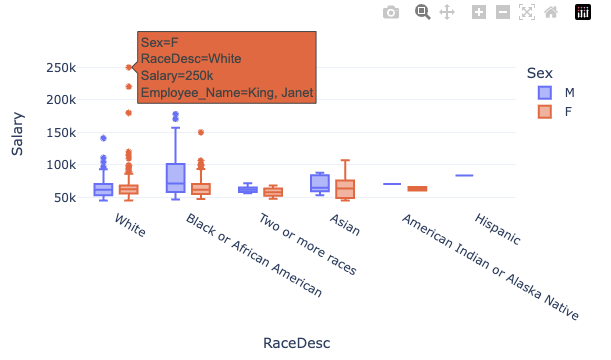